In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


In [200]:
spotify_df = pd.read_csv("../data/Cleaned_Spotify_2024_Global_Streaming_Data.csv")
spotify_df.head()

,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2020,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,After Hours,R&B,2023,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Austin,Reggaeton,2019,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,Autumn Variations,K-pop,2019,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,Autumn Variations,R&B,2019,7.89,3323.25,13446.32,4.47,Free,173.43,15.82


In [201]:
# Group by genre and calculate the average total streams
avg_streams = spotify_df.groupby("Genre")["Total Streams (Millions)"].mean().sort_values(ascending=False)
avg_streams


Genre
R&B          2779.311707
K-pop        2760.691667
Classical    2739.955417
Pop          2686.797500
Indie        2661.669400
Rock         2558.947069
EDM          2466.699804
Jazz         2408.460000
Reggaeton    2404.313636
Hip Hop      2284.867551
Name: Total Streams (Millions), dtype: float64

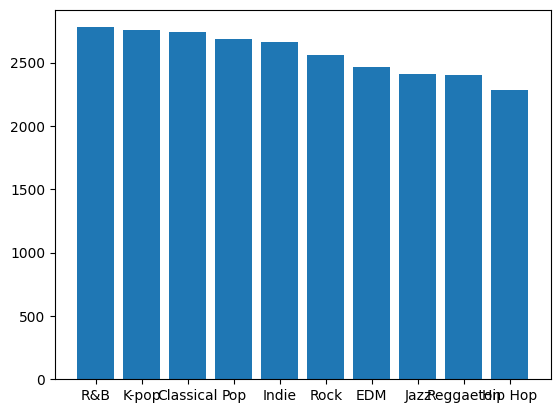

In [202]:
plt.bar(avg_streams.index, avg_streams.values)
plt.show()

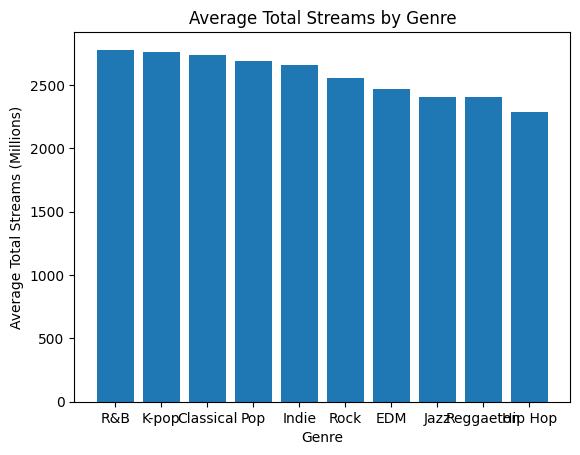

In [203]:

plt.bar(avg_streams.index, avg_streams.values)
plt.xlabel("Genre")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Average Total Streams by Genre")

plt.savefig("../plots/Average_Streams_by_genre.png")
plt.show()


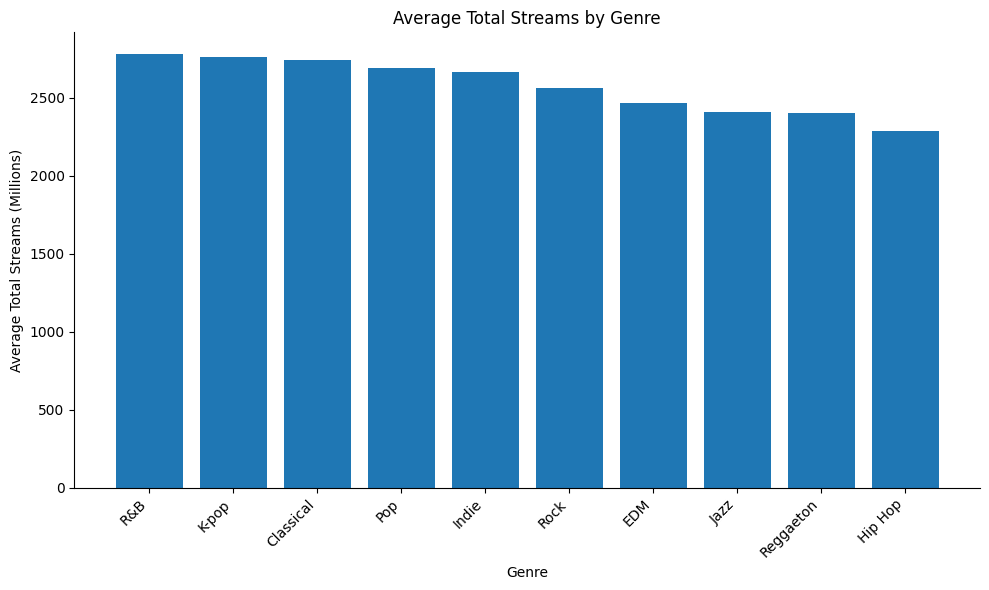

In [204]:
plt.figure(figsize=(10, 6))
plt.bar(avg_streams.index, avg_streams.values)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Genre")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Average Total Streams by Genre")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig("../plots/Average_Streams_by_genre.png")
plt.show()

In [205]:
avg_artist_streams = spotify_df.groupby("Artist")["Total Streams (Millions)"].mean().sort_values(ascending=False)
avg_artist_streams


Artist
Dua Lipa          3008.270000
Ariana Grande     2869.031111
BTS               2824.987955
BLACKPINK         2763.213243
Bad Bunny         2655.404000
Billie Eilish     2650.803548
Doja Cat          2649.965588
Drake             2611.255161
The Weeknd        2523.978000
Ed Sheeran        2510.267143
Olivia Rodrigo    2481.721765
Post Malone       2415.280323
Karol G           2344.262432
Taylor Swift      2270.203333
SZA               1919.527000
Name: Total Streams (Millions), dtype: float64

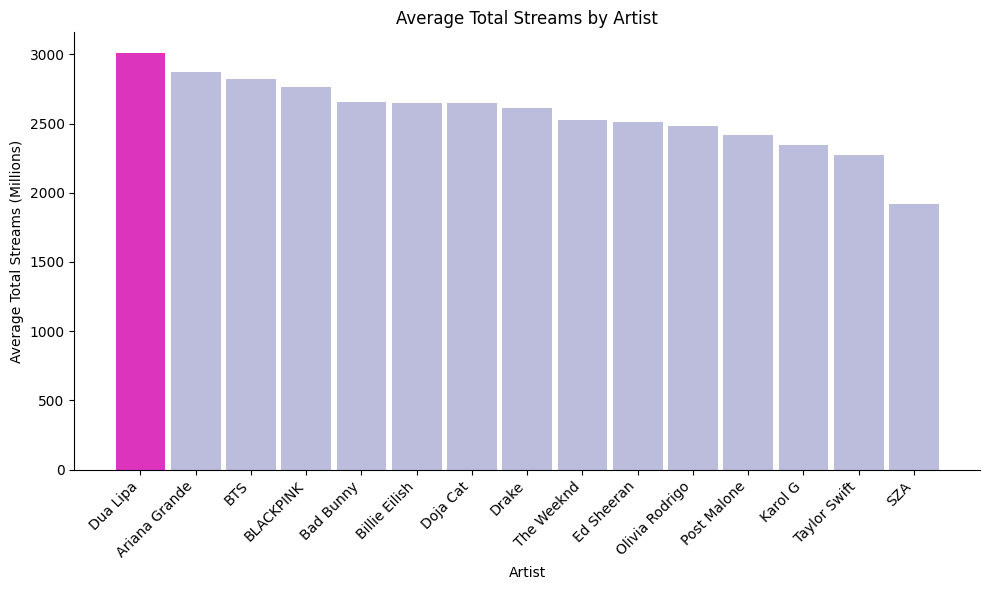

In [206]:
plt.figure(figsize=(10, 6))
colors = ["#bcbddc"]*len(avg_artist_streams)
max_index = avg_artist_streams.idxmax()
highlight_position  = avg_artist_streams.index.get_loc(max_index)
colors[highlight_position] = "#dc34bd"

plt.bar(avg_artist_streams.index, avg_artist_streams.values, color= colors, width=0.9)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Artist")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Average Total Streams by Artist")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig("../plots/Average_Streams_by_Artist.png")
plt.show()

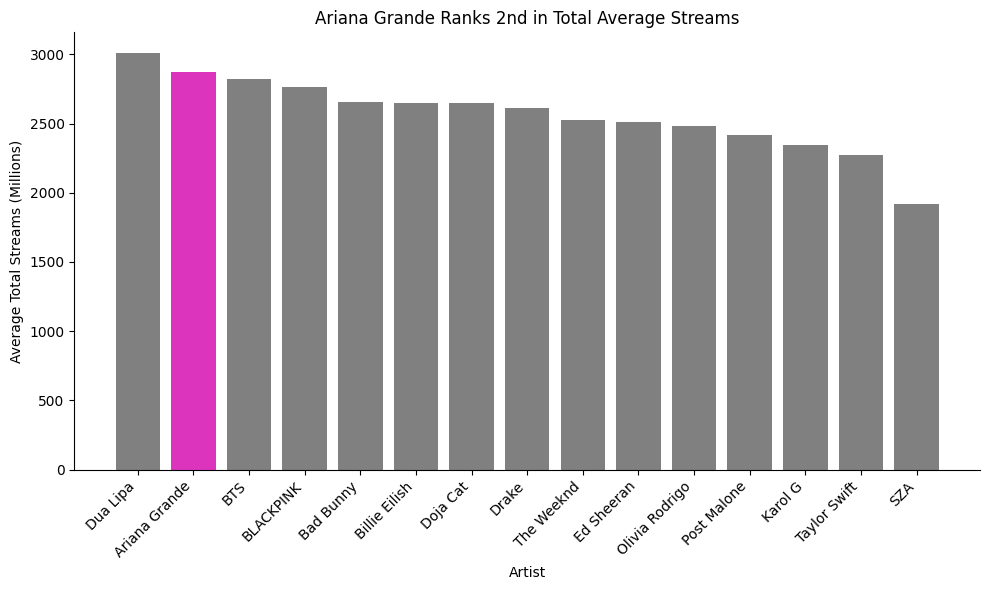

In [207]:
plt.figure(figsize=(10, 6))

special_artists = "Ariana Grande"
colors = ["#dc34bd" if artist == special_artists else "gray" for artist in avg_artist_streams.index]

plt.bar(avg_artist_streams.index, avg_artist_streams.values, color=colors, width=0.8)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Artist")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Ariana Grande Ranks 2nd in Total Average Streams") 
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig("../plots/ArianaGrande_2nd_inTotalAvgStreams.png")
plt.show()

In [208]:
spotify_df.columns
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          500 non-null    object 
 1   Artist                           500 non-null    object 
 2   Album                            500 non-null    object 
 3   Genre                            500 non-null    object 
 4   Release Year                     500 non-null    int64  
 5   Monthly Listeners (Millions)     500 non-null    float64
 6   Total Streams (Millions)         500 non-null    float64
 7   Total Hours Streamed (Millions)  500 non-null    float64
 8   Avg Stream Duration (Min)        500 non-null    float64
 9   Platform Type                    500 non-null    object 
 10  Streams Last 30 Days (Millions)  500 non-null    float64
 11  Skip Rate (%)                    500 non-null    float64
dtypes: float64(6), int64(1

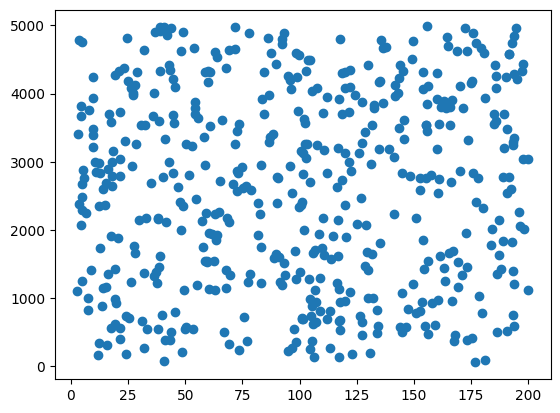

In [209]:
plt.scatter(spotify_df["Streams Last 30 Days (Millions)"],spotify_df["Total Streams (Millions)"])
plt.show()

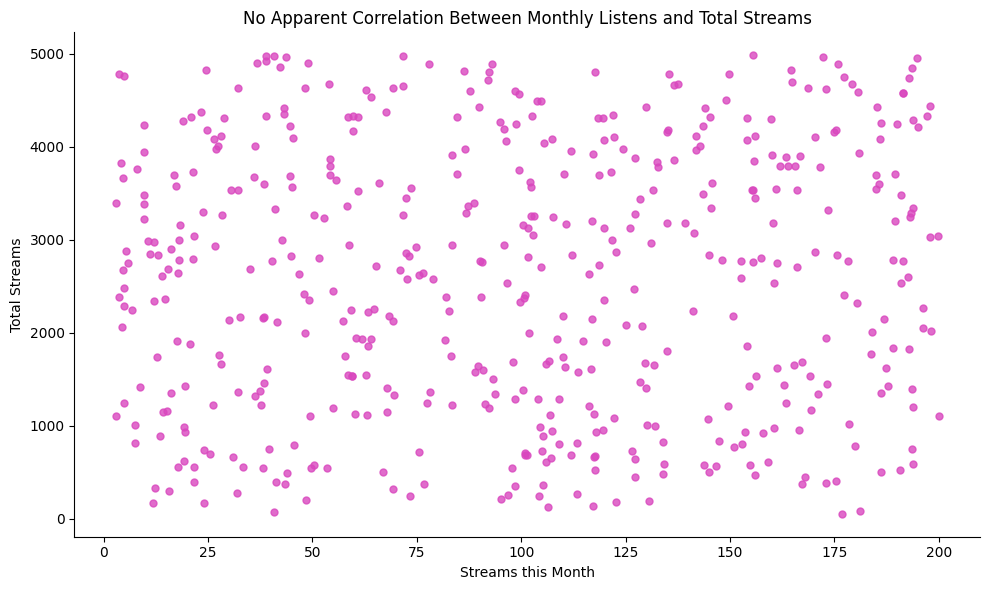

In [210]:
plt.figure(figsize=(10, 6))

plt.scatter(
    spotify_df["Streams Last 30 Days (Millions)"],
    spotify_df["Total Streams (Millions)"],
    color = "#d947be",
    alpha = 0.8,
    s=25)

plt.xlabel("Streams this Month")
plt.ylabel("Total Streams")
plt.title("No Apparent Correlation Between Monthly Listens and Total Streams")

ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("../plots/NoApparentCorrelationBetweenMonthlyListens_and_TotalStream.png")
plt.show()

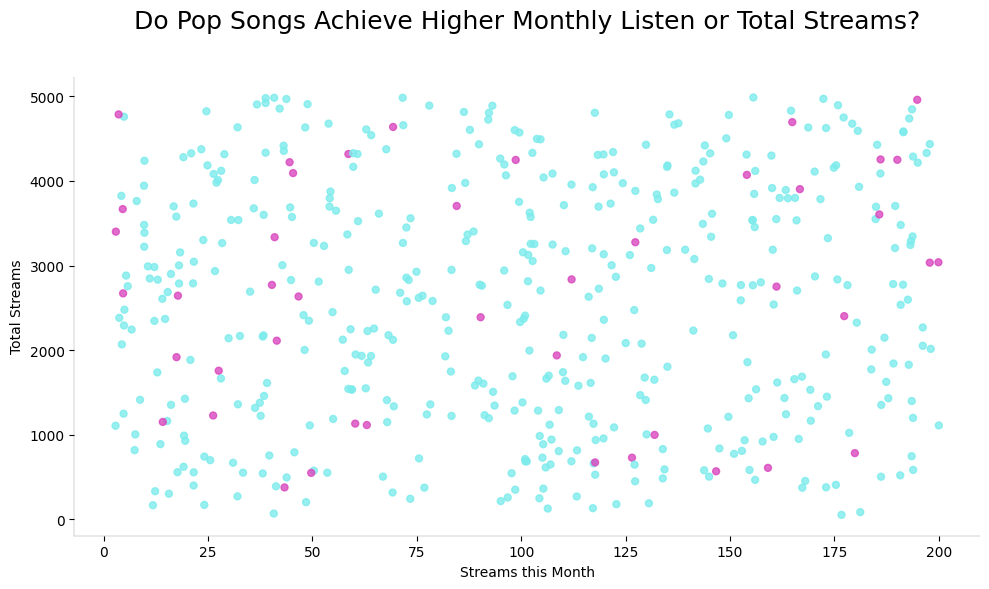

In [211]:
plt.figure(figsize=(10, 6))
featured_genre='Pop'
colors = ["#d947be" if genre == featured_genre else "#7debec" for genre in spotify_df["Genre"]]

plt.scatter(
    spotify_df["Streams Last 30 Days (Millions)"],
    spotify_df["Total Streams (Millions)"],
    color = colors,
    alpha = 0.8,
    s=25)


plt.xlabel("Streams this Month")
plt.ylabel("Total Streams")
plt.title("No Apparent Correlation Between Monthly Listens and Total Streams")

ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Do Pop Songs Achieve Higher Monthly Listen or Total Streams?", fontsize=18,pad=35)

for spine in ax.spines.values():
    spine.set_linewidth(0.25)
    spine.set_alpha(0.5)

plt.tight_layout()
plt.savefig("../plots/ScatterChartPopSongs.png")
plt.show()

In [212]:
yearly_avg=spotify_df.groupby("Release Year")["Total Streams (Millions)"].mean().round(2)
yearly_avg

Release Year
2018    2611.26
2019    2516.45
2020    2569.62
2021    2763.21
2022    2367.99
2023    2817.97
Name: Total Streams (Millions), dtype: float64

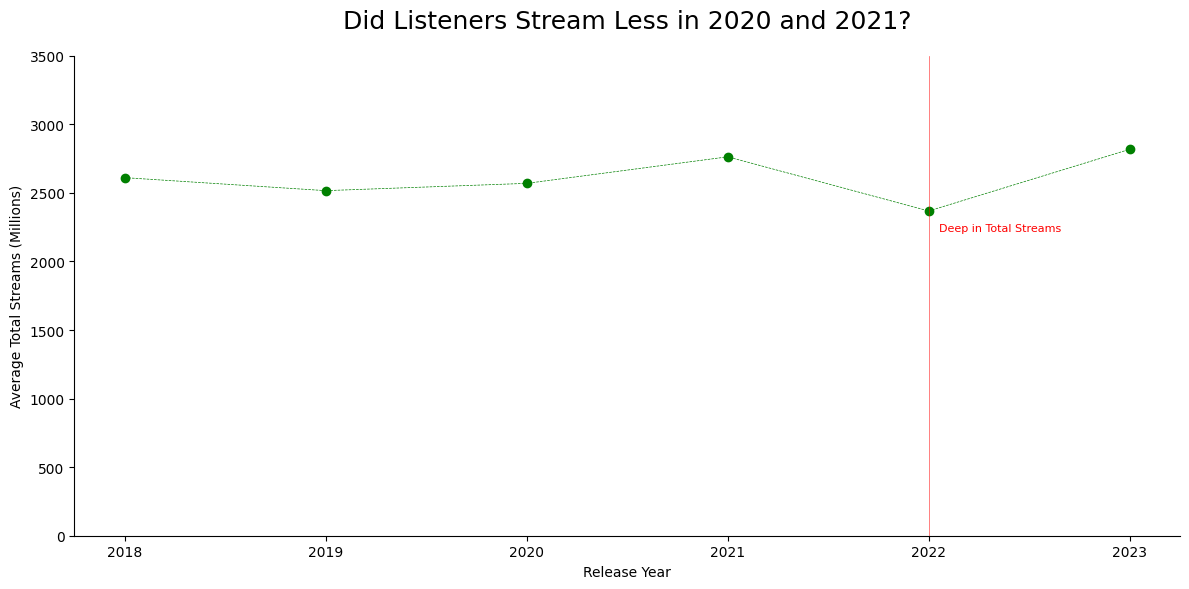

In [213]:
plt.figure(figsize=(12,6))
plt.plot(
    yearly_avg.index, 
    yearly_avg.values,
    marker='o',
    linestyle ='--',
    color = "green",
    linewidth=0.5)

plt.xlabel("Release Year")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Did Listeners Stream Less in 2020 and 2021?", fontsize=18,pad=20)

ax=plt.gca()
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

ax.axvline(2022, color='red', linewidth=0.5, alpha=0.7)
ax.text(
    2022+0.05,
    2225, 
    "Deep in Total Streams",
    color='red', 
    fontsize=8)


plt.ylim(0, 3500)

plt.tight_layout()
plt.savefig("../plots/LineChartListenersStream2020_2021.png")
plt.show()

In [214]:
# Pie Chart 
category="Platform Type"
values="Total Streams (Millions)"
platform_totals = spotify_df.groupby(category)[values].sum()
platform_totals


Platform Type
Free       638685.97
Premium    651891.07
Name: Total Streams (Millions), dtype: float64

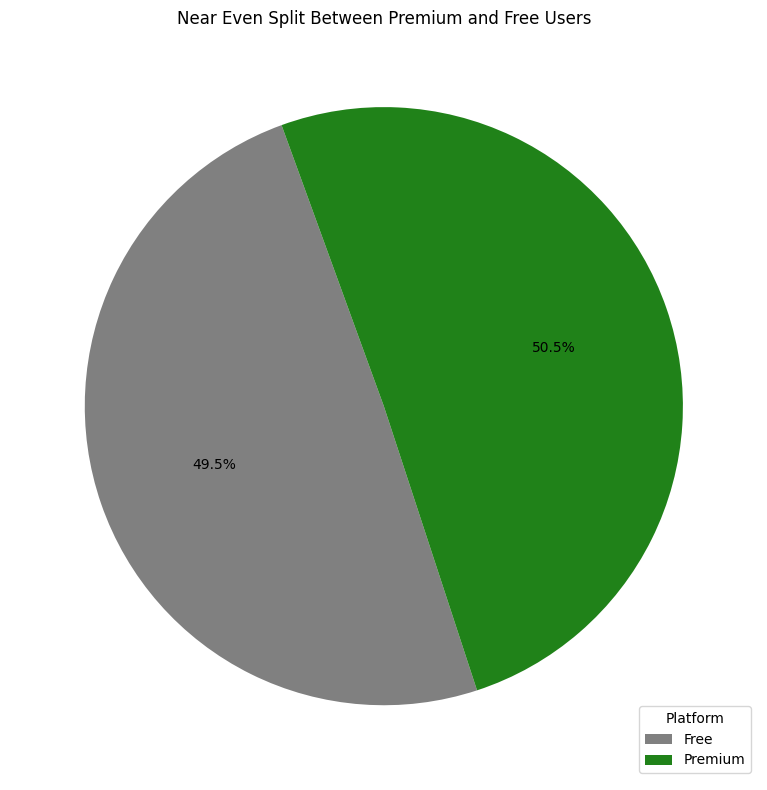

In [215]:
plt.figure(figsize=(8,8))
plt.pie(
    platform_totals,
    labels=None,
    startangle=110,
    colors=["gray","#208219"],
    autopct='%1.1f%%')

plt.title("Near Even Split Between Premium and Free Users")

plt.legend(
    labels=platform_totals.index,
    loc="lower right", 
    title="Platform")

plt.tight_layout()
plt.savefig("../plots/PieChartPremium_and_FreeUsers.png")
plt.show()

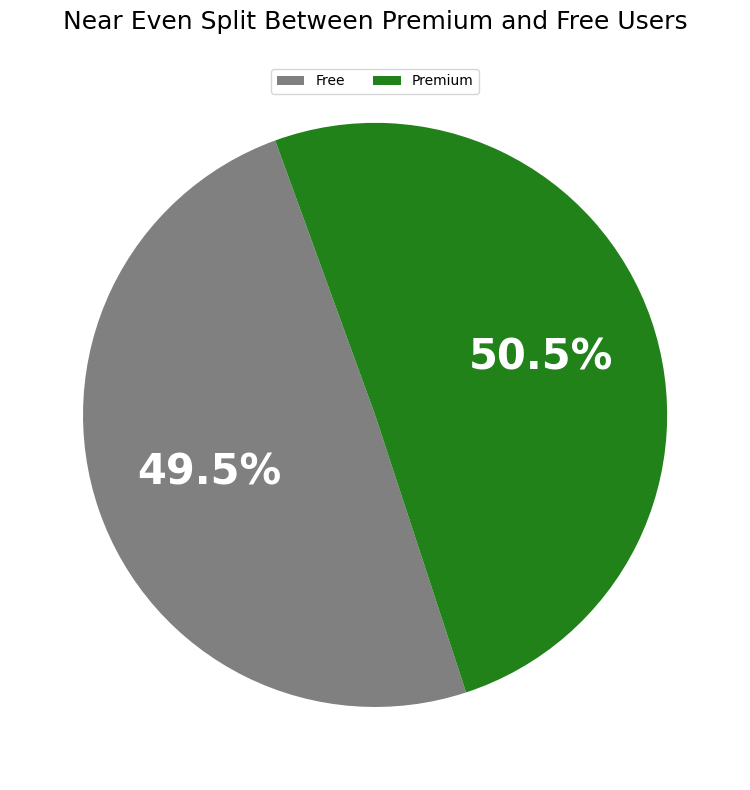

In [216]:
fig, ax = plt.subplots(figsize=(8,8))

wedges, text, autotexts = ax.pie(
    platform_totals,
    autopct='%1.1f%%',
    startangle=110,
    colors=["gray","#208219"])



ax.set_title(
    "Near Even Split Between Premium and Free Users",
    fontsize=18,
    pad=15,
    loc="center")

for autotext in autotexts:
    autotext.set_fontsize(30)
    autotext.set_color('white')
    autotext.set_weight('bold')

ax.legend(
    wedges,
    platform_totals.index,
    loc="lower center", 
    bbox_to_anchor=(0.5, 0.93),
    ncol=2)

plt.tight_layout()
plt.savefig("../plots/PieChartBigPercentView.png")
plt.show()

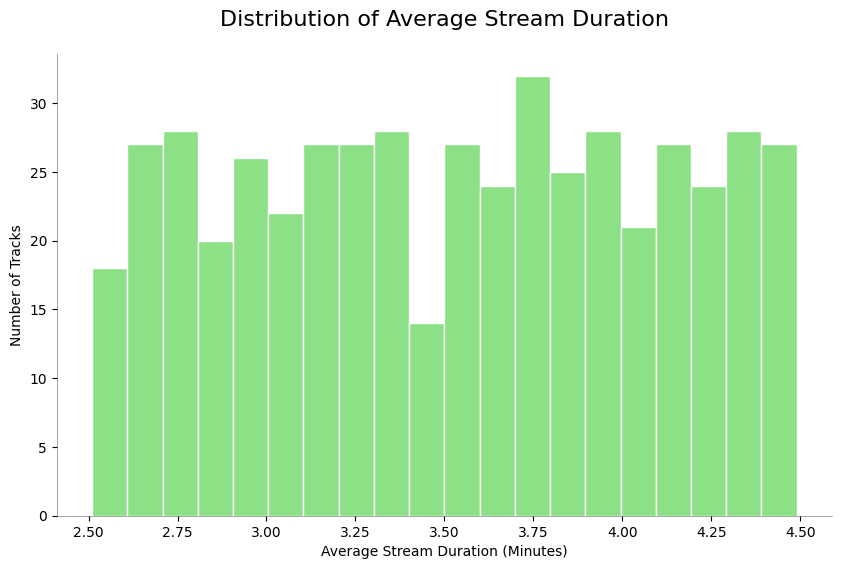

In [217]:
# Creating Histogram using Matplotlib

plt.figure(figsize=(10,6))

plt.hist(
    spotify_df["Avg Stream Duration (Min)"],
    bins=20,
    color="#8ce186",
    edgecolor='white')

plt.xlabel("Average Stream Duration (Minutes)")
plt.ylabel("Number of Tracks")
plt.title("Distribution of Average Stream Duration",fontsize=16,pad=20)

ax=plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("../plots/Average_Streams_Histogram.png")
plt.show()

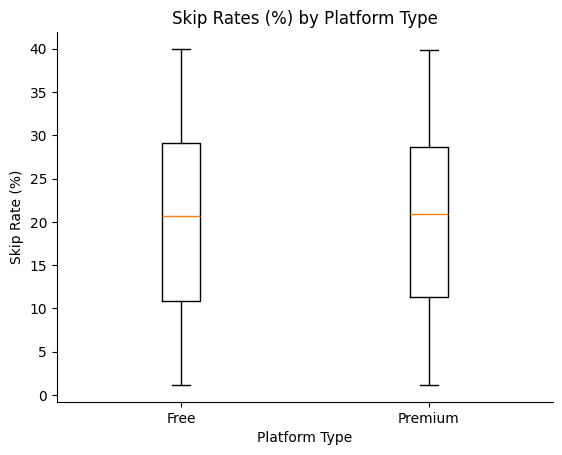

In [218]:
#Creating Boxplots using Matplotlib

plt.boxplot(
    [spotify_df[spotify_df["Platform Type"]=="Free"]["Skip Rate (%)"],
    spotify_df[spotify_df["Platform Type"]=="Premium"]["Skip Rate (%)"]]
)

plt.xticks([1, 2], ["Free", "Premium"])
plt.xlabel("Platform Type")
plt.ylabel("Skip Rate (%)")
plt.title("Skip Rates (%) by Platform Type")

ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("../plots/BoxplotChart.png")
plt.show()



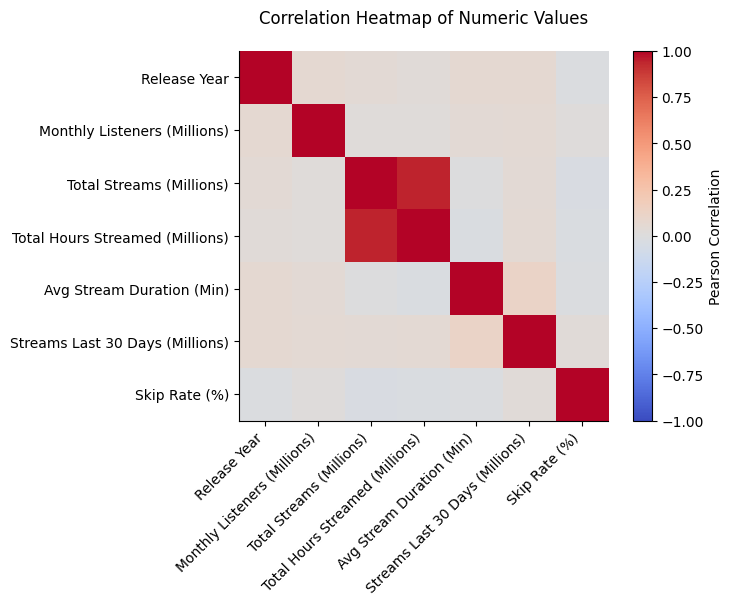

In [219]:
#Heatmaps using Matplotlib
numeric_spotify_df=spotify_df.select_dtypes(include=[np.number])
corr = numeric_spotify_df.corr()

im = plt.imshow(corr, vmin=-1, vmax=1, cmap='coolwarm')
plt.colorbar(im, label= "Pearson Correlation")

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap of Numeric Values", pad=20)

ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("../plots/CorrelationHeatmap_of_Numeric_Values.png")
plt.show()

In [220]:
#Value Counts using Matplotlib
genre_counts= spotify_df["Genre"].value_counts().sort_values(ascending=False)
genre_counts



Genre
Classical    72
Rock         58
EDM          51
Indie        50
Hip Hop      49
K-pop        48
Pop          44
Reggaeton    44
Jazz         43
R&B          41
Name: count, dtype: int64

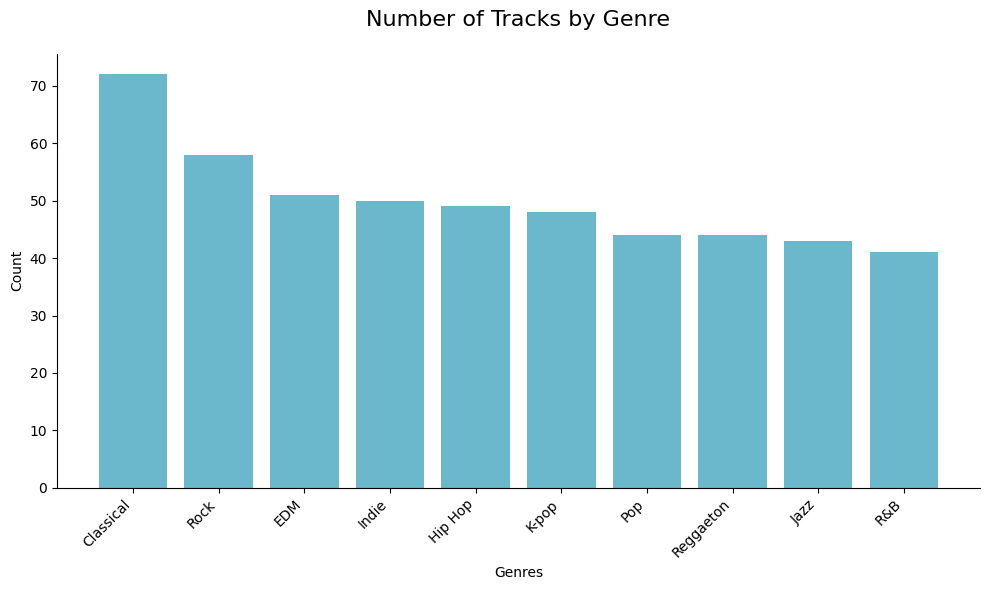

In [221]:
#Continue to the bar chart
plt.figure(figsize=(10,6))

plt.bar(genre_counts.index, genre_counts.values,  color="#5bafc7",alpha=0.9)

plt.xticks(rotation=45, ha='right')

plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Number of Tracks by Genre",fontsize=16,pad=20)

ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("../plots/BarChartNumber_of_Tracks_by_Genre.png")
plt.show()